###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth.

# Coding Assignment: Rocket

The equations of motion for a rocket in purely vertical flight are given by

$$
\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}
$$

$h$ is the altitude of the rocket

$m_s = 50kg$ is the weight of the rocket shell

$g = 9.81 \frac{m}{s^2}$

$\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

$A = \pi r^2$ is the maximum cross sectional area of the rocket, where $r = 0.5 m$

$v_e = 325 \frac{m}{s}$ is the exhaust speed

$C_D = 0.15 $ is the drag coefficient

$m_{po} = 100 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$

where $\dot{m}_p$ is the time-varying burn rate given by the following figure:

Propellant Burn Rate

![burn rate](./figures/burn_rate.png)

that is,

$$
\begin{equation}
    \dot{m}_p \left( t \right) =
    \begin{cases}
        20 & \quad \text{if} \quad t < 5 \\
        0 & \quad \text{otherwise}
    \end{cases}
\end{equation}
$$

Using Euler's method with a time-step size of $\Delta t=0.1s$, create a Python script to calculate the altitude and velocity of the rocket from launch until crash down.

## Assessment:

To check your answers, you can register for [MAE 6286: Practical Numerical Methods with Python](https://openedx.seas.gwu.edu/courses/course-v1:MAE+MAE6286+2017/about).

1. At time $t=3.2s$, what is the mass (in kg) of rocket propellant remaining in the rocket?

2. What is the maximum speed of the rocket in $\frac{m}{s}$?
    At what time does this occur (in seconds)? 
    What is the altitude at this time (in meters)? 
    
3. What is the rocket's maximum altitude during flight (in meters)? At what time (in seconds) does this occur?

4. At what time (in seconds) does the rocket impact the ground? What is the velocity of the rocket (in $\frac{m}{s}$) at time of impact?

## Derivation of the rocket equations

In case you are kind of confused about the rocket equations, here we show how to get to them. 

Newton's second law states that the acceleration of the vehicle times its mass is equal to all the forces acting on it. Therefore,

\begin{equation}
(m_s + m_p)\frac{d\bf{v}}{dt}=\sum {\bf F}.
\end{equation}
In the above formula we have assumed that the propellant inside the rocket and the rocket move at the same velocity (in other words, their relative velocity is negligible). 

Two of the external forces acting on the rocket are,

\begin{align}
{\bf F}_g&= (m_s+m_p)\bf{g} \quad (\rm{Gravity}),\\
{\bf F}_d&= - \frac{1}{2} \rho_a \mathbf{v} |\mathbf{v}| A  C_D \quad (\rm{Drag}).
\end{align}

We also need to consider the force resulting from the ejection of the propellant. During an interval $dt$, the engine of the rocket ejects downwards a mass of propellant given by $\dot m_p dt$. Relative to the rocket, the speed of the ejected burning gas is assumed constant and equal to $v_e$ (the exhaust speed). The momentum variation induced on the exhaust gas by the engine during that interval is therefore, $d{\bf p}_{gas} = \dot m_p {\bf v}_e dt$. Again using Newton's second law we conclude that the force applied by the rocket on the gas is,

\begin{align}
{\bf F}_{rocket\rightarrow gas} = \frac{d{\bf p}_{gas}}{dt} = \dot m_p {\bf v}_e
\end{align}

Using Newton's third law (|action| = |reaction|), the force exerted by the exhaust gas on the rocket is then,

\begin{align}
{\bf F}_{gas\rightarrow rocket} = -{\bf F}_{rocket\rightarrow gas} = -\dot m_p {\bf v}_e
\end{align}

If we collect all the forces acting on the rocket we finally have:

\begin{align}
(m_s + m_p)\frac{d\bf{v}}{dt}=(m_s+m_p){\bf g}- \frac{1}{2} \rho_a \mathbf{v} |v| A  C_D -\dot m_p {\bf v}_e
\end{align}



---

###### The cell below loads the style of the notebook.

In [1]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())

In [1]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

#### Create the time grid

In [2]:

T = 100.0  # length of the time-interval
dt = 0.1  # time-step size
N = int(T / dt) + 1  # number of time steps
t = np.linspace(0.0, T, num=N)  # time grid

#### Set given values/coefficients

In [3]:
h_o=0 #initial height [m]
m_s=50 #weight of rocket [kg]
g=9.81 #gravitational force [m/s^2]
rho=1.091 #density of air [kg/m^3]
r=0.5 #max radius of rocket [m]
A=np.pi*r**2 #xc Area of rocket [m^2]
v_e = 325 #exhaust speed [m/s]
C_D = 0.15 #drag coeff
m_po=100 #initial (t=0) weight of propellent

#### Mass equation

In [38]:
m_p_dot=np.zeros_like(t)
for i in range(len(m_p_dot)):
    if (t[i]<=5):
        m_p_dot[i]=20
    else:
        m_p_dot[i]=0
m_p=np.zeros_like(t)
for i in range(len(m_p)):
    if (t[i]<=5):
        m_p[i]=m_po-(t[i]*20)
    else:
        m_p[i]=0
mass=[]
for i in range(len(t)):
    if (t[i]<=5):
        mass.append(m_s+100-t[i]*m_p_dot[i])
    else:
        mass.append(50)

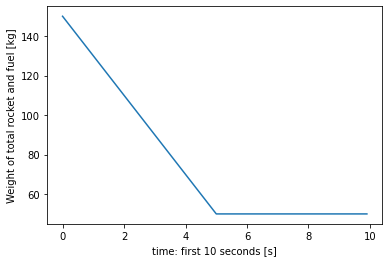

In [37]:
pyplot.plot(t[:100],mass[:100])
pyplot.xlabel('time: first 10 seconds [s]')
pyplot.ylabel('Weight of total rocket and fuel [kg]');

#### Define Euler function

In [53]:
def eulerstep(state,rhs,dt):
    '''Update a state to the next time increment using Euler's method
    
    Arguments:
    state : array of dependant vars (independant var is time)
    rhs   : function that computes the rigth hand side of a diff eq
    dt    : float, time increment
    
    Returns:
    next_state: array, updates state after one time step
    '''
    
    next_state = state + rhs(state)*dt
    
    return next_state

#### Write equation of motion

In [101]:
def rocket(state):
    '''Compute rhe right hand side of the string mass diff eq
    
    Arguments:
    state    : array of state variables, (h,v)
    
    Returns  :
    derivs   : arrray of derivatives (v,e.o.m.)  
    '''
    for i in range(len(m_p_dot)):
        if(t[i]<=5):
            derivs =np.array([state[1], -g+(m_p_dot[i]*v_e)/(m_s+m_p[i])-(0.5/(m_s+m_p[i]))*rho*state[1]*abs(state[1])*A*C_D])
        else:
            derivs=np.array([state[1],-g-(0.5/m_s)*rho*state[1]*abs(state[1])*A*C_D])

    return derivs

#### Initialise state of rocket array

In [102]:
sol=np.zeros([N,2])#numerical solution [h,v]
sol[0,0]=h_o #initial hieght = 0m
sol[0,1]=v_e #initial velocity =exhaust speed [m/s]

In [103]:
for i in range(N-1):
    sol[i+1] = eulerstep(sol[i],rocket,dt)
#finding the numerical solutions using euler step and right hand side of rocket

In [93]:
print(sol)

[[    0.           325.        ]
 [   32.5          310.4429755 ]
 [   63.54429755   297.07487772]
 ...
 [-6127.7854987    -87.36380815]
 [-6136.52187952   -87.36380815]
 [-6145.25826033   -87.36380816]]


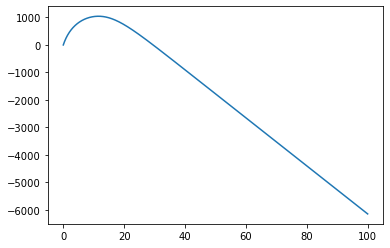

In [95]:
pyplot.plot(t,sol[:,0])